In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image, ImageDraw, ImageOps

np.random.seed(12)

In [2]:
def read_image(path):
    return Image.fromarray((plt.imread(path)*255).astype(np.uint8))

In [3]:
background = read_image('../DOTA/images_p1/P0076.png')
background.size

(719, 635)

In [4]:
tank = read_image('images/objects/t72b3.png')
tank.size

(319, 133)

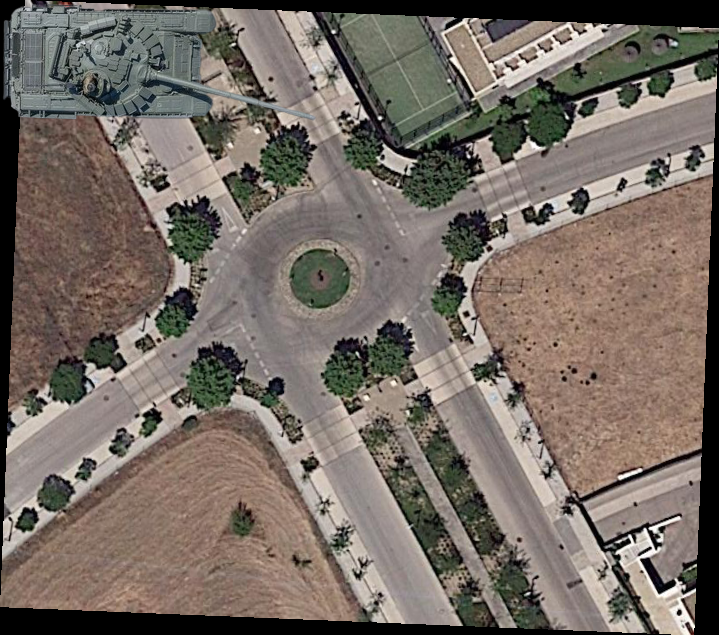

In [5]:
sample = background.copy()
sample.paste(tank, (0,0), tank)
sample

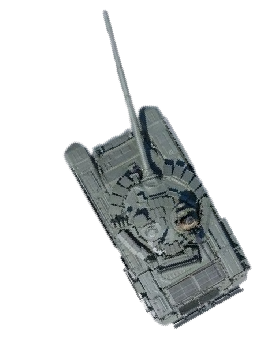

In [6]:
tank_r = tank.rotate(120, expand=True)
tank_r

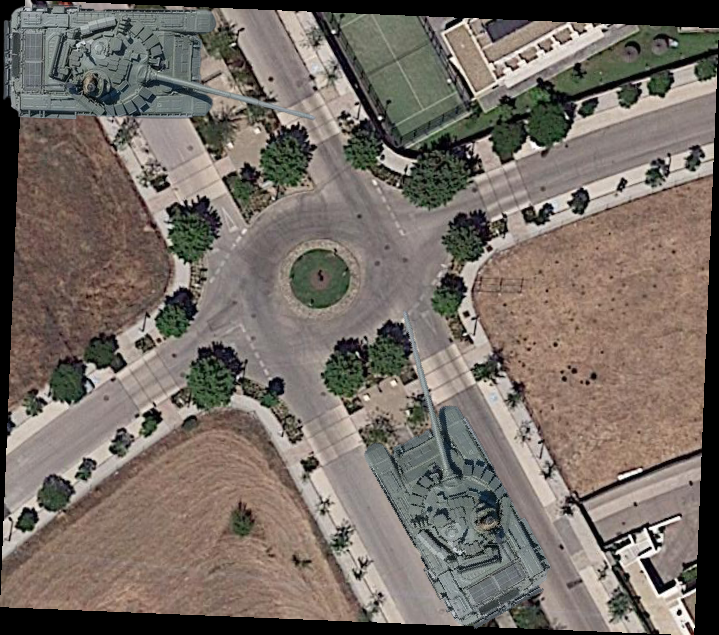

In [7]:
sample.paste(tank_r, (300,300), tank_r)
sample

In [8]:
def resize(image, target_width):
    target_height = int(image.size[1]*target_width/image.size[0])

    return image.resize((target_width,target_height))

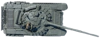

In [9]:
resize(tank, 100)

In [10]:
from os import listdir
path_to_objects = 'images/objects/'
v_list = listdir(path_to_objects)
v_list

['bmp-2m.png',
 'bmp-3.png',
 'btr-82a.png',
 'deryvatsia-pvo.png',
 'kurganets-25.png',
 'mlrs_9k58_smerch.png',
 't72b3.png']

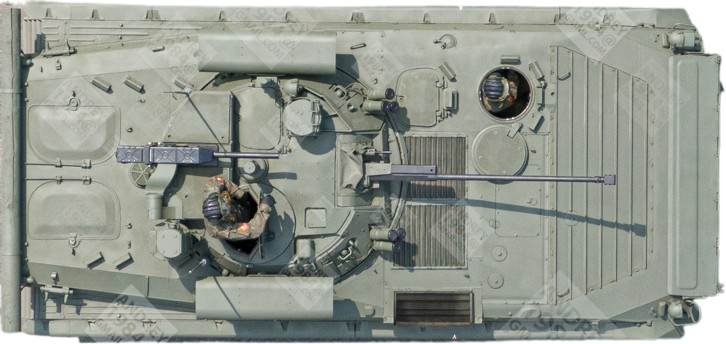

In [11]:
vehicles = [read_image(path_to_objects + v) for v in v_list]
vehicles[0]

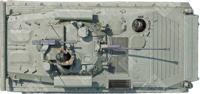

In [12]:
resize(vehicles[0], 200)

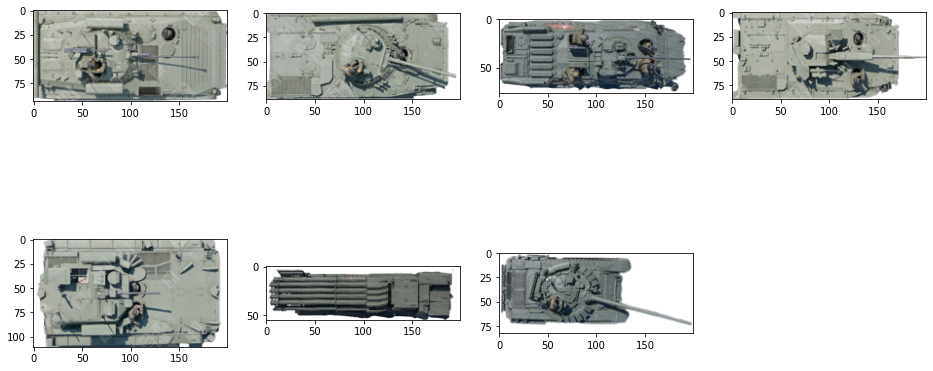

In [13]:
plt.figure(figsize=(16, 8))

for i in range(0, 7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(resize(vehicles[i], 200))

plt.show()

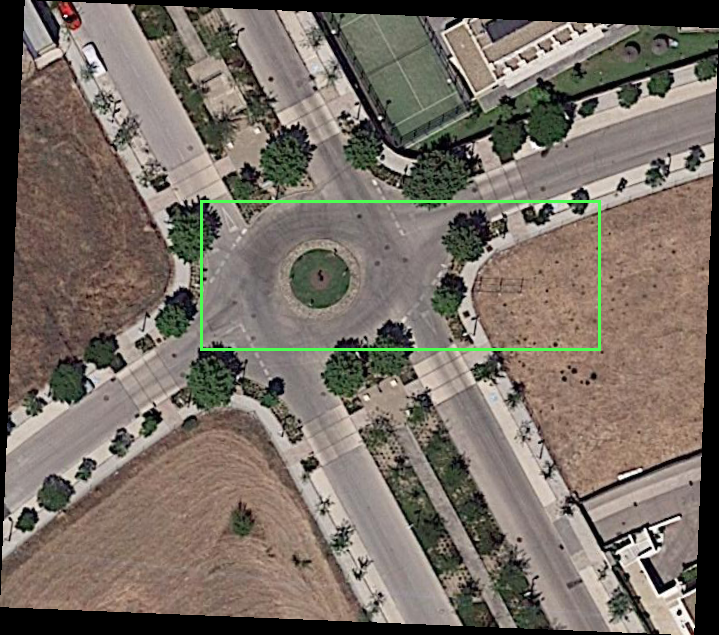

In [14]:
image = background.copy()
draw = ImageDraw.Draw(image)
draw.rectangle((200, 200, 600, 350), outline='#4CFF52', width=3)
image

In [15]:
#TODO preserve real-world ratio between objects

objects = [resize(v, 100) for v in vehicles]

In [16]:
def put_objects(background, n_min=1, n_max=10, objects=objects):
    base = background.copy()
    n = np.random.randint(n_min, n_max+1)
    
    bboxes = []
    for i in range(n):
        obj = objects[np.random.randint(len(objects))]
        
        obj = obj.rotate(np.random.randint(360), expand=True)
        x, y = np.random.randint(background.size[0]) - obj.size[0]//2, np.random.randint(background.size[1]) - obj.size[1]//2
        
        bboxes.append((x, y, x + obj.size[0], y + obj.size[1]))
        
        base.paste(obj, (x, y), obj)
    
    return base, bboxes 
        

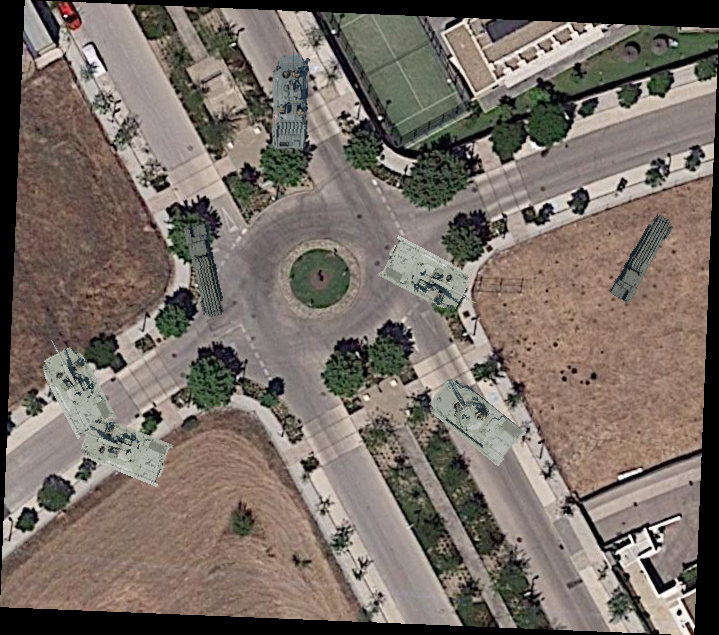

In [17]:
base, bboxes = put_objects(background)
base

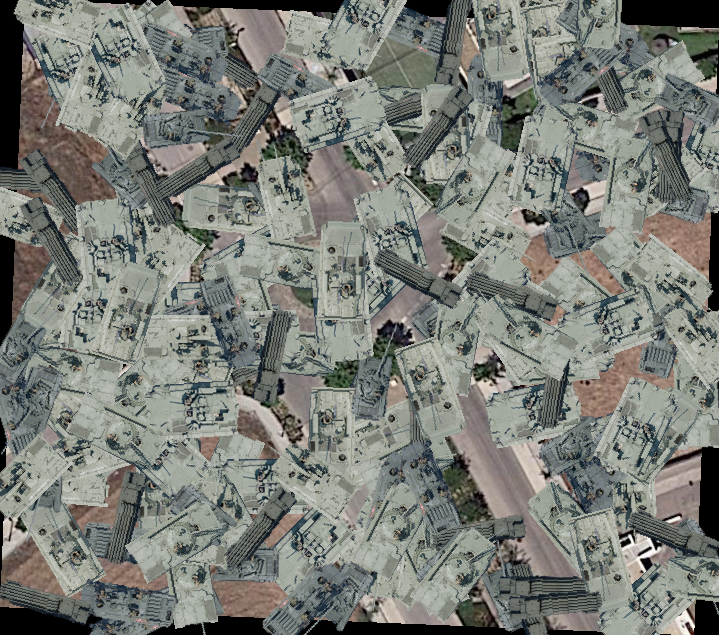

In [18]:
put_objects(background, 100, 200)[0]

In [19]:
def plot_boxes(image, boxes, outline='#4CFF52', width=3):
    image = image.copy()
    draw = ImageDraw.Draw(image)
    
    for b in boxes:
        draw.rectangle(b, outline=outline, width=width)
        
    return image

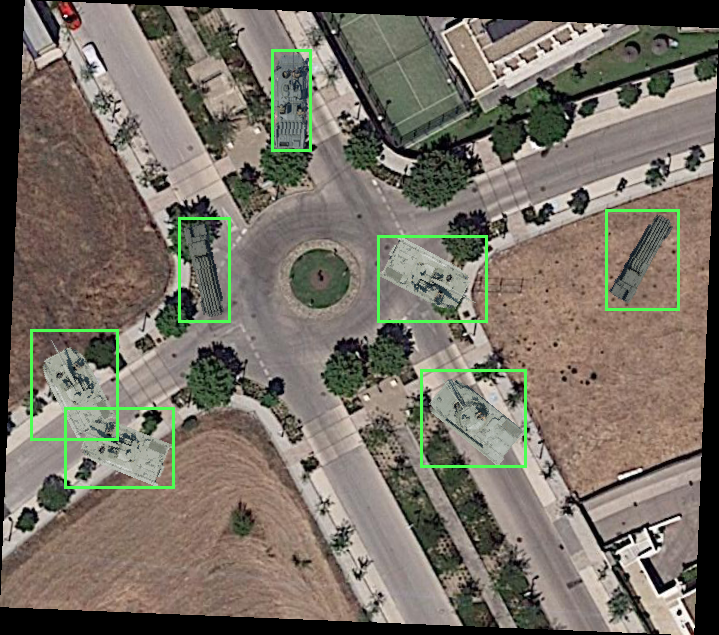

In [20]:
plot_boxes(base, bboxes)